The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


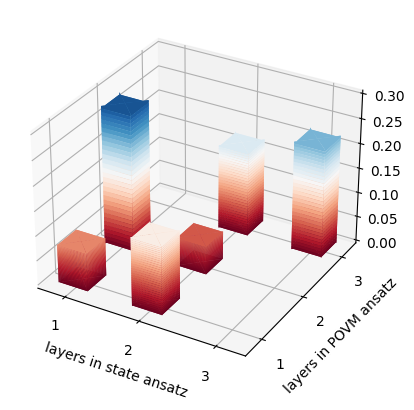

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.colors 
import numpy as np
import matplotlib.cm as cm

fig = plt.figure()
ax = fig.add_subplot(111, projection= Axes3D.name)

cmap = cm.get_cmap('RdBu')

def make_bar(ax, x0=0, y0=0, width = 0.5, height=1 , cmap=cmap,  
              norm=matplotlib.colors.Normalize(vmin=0, vmax=1), **kwargs ):
    # Make data
    u = np.linspace(0, 2*np.pi, 4+1)+np.pi/4.
    v_ = np.linspace(np.pi/4., 3./4*np.pi, 100)
    v = np.linspace(0, np.pi, len(v_)+2 )
    v[0] = 0 ;  v[-1] = np.pi; v[1:-1] = v_
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))

    xthr = np.sin(np.pi/4.)**2 ;  zthr = np.sin(np.pi/4.)
    x[x > xthr] = xthr; x[x < -xthr] = -xthr
    y[y > xthr] = xthr; y[y < -xthr] = -xthr
    z[z > zthr] = zthr  ; z[z < -zthr] = -zthr

    x *= 1./xthr*width; y *= 1./xthr*width
    z += zthr
    z *= height/(2.*zthr)
    #translate
    x += x0; y += y0
    #plot
    ax.plot_surface(x, y, z, cmap=cmap, norm=norm, **kwargs)

def make_bars(ax, x, y, height, width=1):
    widths = np.array(width)*np.ones_like(x)
    x = np.array(x).flatten()
    y = np.array(y).flatten()

    h = np.array(height).flatten()
    w = np.array(widths).flatten()
    norm = matplotlib.colors.Normalize(vmin=0, vmax = 0.3) #vmax=h.max())
    for i in range(len(x.flatten())):
        make_bar(ax, x0=x[i], y0=y[i], width = w[i] , height=h[i], norm=norm)


# Plot cost of star star

x = [1,1,2,2,2,3]
y = [1,2,1,2,3,3]
z = [0.077628032,0.281237558,0.139140657,0.057468691,0.172407401,0.221229531]

# Add text annotations for each data point
#for i in range(len(x)):
#    ax.text(x[i], y[i], z[i], '{:.1f}'.format(z[i]), color='red')
    
make_bars(ax, x,y,z, width=0.2, )

# Set the x and y tick labels to start from 1
xticks = np.arange(1, 4)
yticks = np.arange(1, 4)
plt.xticks(xticks)
plt.yticks(yticks) 

# Set z-range
ax.set_zlim(0, 0.3)

plt.xlabel('layers in state ansatz')
plt.ylabel('layers in POVM ansatz')

plt.savefig('no_noise_3D_star.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


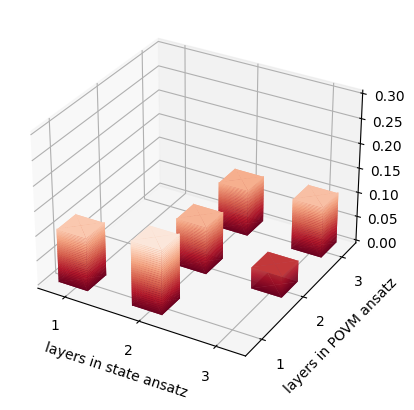

In [13]:
# Plot cost of poly-poly

fig = plt.figure()
ax = fig.add_subplot(111, projection= Axes3D.name)


x = [1,2,2,2,3,3]
y = [1,1,2,3,2,3]
z = [0.109749013,0.132629794,0.097989308,0.095940934,0.043887846,0.105379402]


# Add text annotations for each data point
#for i in range(len(x)):
#    ax.text(x[i], y[i], z[i], '{:.1f}'.format(z[i]), color='red')
    
make_bars(ax, x,y,z, width=0.2, )

# Set the x and y tick labels to start from 1
xticks = np.arange(1, 4)
yticks = np.arange(1, 4)
plt.xticks(xticks)
plt.yticks(yticks) 

# Set z-range
ax.set_zlim(0, 0.3)

plt.xlabel('layers in state ansatz')
plt.ylabel('layers in POVM ansatz')

plt.savefig('no_noise_3D_poly.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


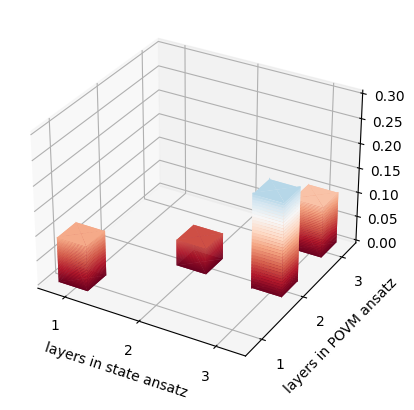

In [14]:
# Plot cost of squeez-squeez

fig = plt.figure()
ax = fig.add_subplot(111, projection= Axes3D.name)


x = [1,2,3,3]
y = [1,2,2,3]
z = [0.093146116,0.053965388,0.193692521,0.106370049]


# Add text annotations for each data point
#for i in range(len(x)):
#    ax.text(x[i], y[i], z[i], '{:.1f}'.format(z[i]), color='red')
    
make_bars(ax, x,y,z, width=0.2, )

# Set the x and y tick labels to start from 1
xticks = np.arange(1, 4)
yticks = np.arange(1, 4)
plt.xticks(xticks)
plt.yticks(yticks) 

# Set z-range
ax.set_zlim(0, 0.3)

plt.xlabel('layers in state ansatz')
plt.ylabel('layers in POVM ansatz')

plt.savefig('no_noise_3D_squeez.eps')
plt.show()

Text(0, 0.5, 'layers in POVM ansatz')

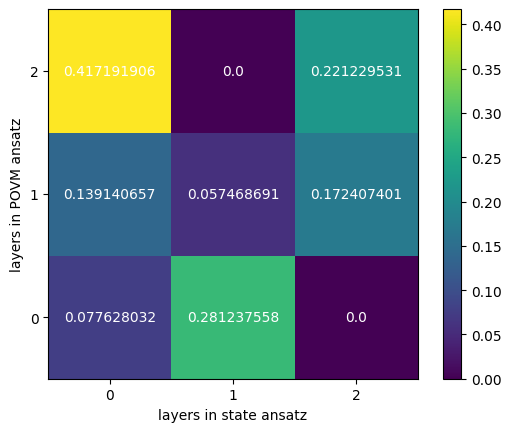

In [4]:
import matplotlib.pyplot as plt
import numpy as np

data = np.array([[0.077628032, 0.281237558, 0],
 [0.139140657, 0.057468691, 0.172407401],
 [0.417191906, 0, 0.221229531]])

plt.imshow(data, origin='lower')
plt.colorbar()

# Add text annotations for each data point
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        plt.annotate(str(data[i, j]), (j, i), color='w', ha='center', va='center')
        
# Set the x and y tick labels to start from 1
xticks = np.arange(0, 3)
yticks = np.arange(0, 3)
plt.xticks(xticks)
plt.yticks(yticks)   

plt.xlabel('layers in state ansatz')
plt.ylabel('layers in POVM ansatz')